In [1]:
import util
import glob
import timm
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import pickle
import os
model = timm.create_model('vit_tiny_patch16_224', pretrained=False)
num_features = model.head.in_features
model.head = nn.Linear(num_features, 10)

cifar100=False

threshold=0.001
baseline_results=[]
spatial_results=[]
L1_results=[]
circle_results=[]
spatial_l2 = []
spatial_swap = []
spatial_learnable=[]
cluster400_results=[]
cluster40_results=[]
cluster10_results=[]
#reg_types = ["cluster10","cluster40","cluster400","baseline","spatial-swap","spatial","spatial-learnable","L1"]
reg_types = ["baseline","spatial-swap","spatial","spatial-learn","L1"]
for reg_type in reg_types:
    file_list =  glob.glob("./scratchcf10models/"+reg_type+"/*")
    file_list.sort(key=lambda x: int(x.split("_")[2].split(".")[0]))
    for file_name in file_list:
        print(file_name)
        
        name = file_name.replace(".","")

        if os.path.exists("./metrics/"+name):
            with open("./metrics/"+name+'.pkl', 'rb') as f:
                result = pickle.load(f)
            print("File loaded successfully:")
        else:

            state_dict = torch.load(file_name)
            model.load_state_dict(state_dict)
            
            initial_acc, percent_small, final_acc = util.evaluate_vit_pruning(model, threshold=threshold,cifar100=cifar100)
            dead_neuron_counts, total_dead, total_neurons = util.count_dead_neurons(state_dict,threshold)        
            model.load_state_dict(state_dict)
            metrics = util.evaluate_metrics(model,cifar100=cifar100)
            robust_accuracy = util.evaluate_robust_accuracy(model, 0.01,cifar100=cifar100)
            shift_accuracy = util.evaluate_on_synthetic_shifts(model,cifar100=cifar100)

            result = {
                "initial_acc" : initial_acc,
                "percent_below_t" : percent_small,
                "final_acc" : final_acc,
                "dead_neurons": total_dead,
                "percent_dead_neurons": total_dead/total_neurons,
                "metrics": metrics,
                "robust_accuracy": robust_accuracy,
                "shift_accuracy": shift_accuracy,
            }
            os.makedirs("./metrics/"+name, exist_ok=True)

            with open("./metrics/"+name+'.pkl', 'wb') as f:
                pickle.dump(result, f)
            print(result)
        if reg_type == "baseline":
            baseline_results.append(result)
        if reg_type == "spatial":
            spatial_results.append(result)
        if reg_type == "L1":
            L1_results.append(result)
        if reg_type=="spatial-circle":
            circle_results.append(result)
        if reg_type=="spatiall2":
            spatial_l2.append(result)
        if reg_type=="spatial-swap":
            spatial_swap.append(result)
        if reg_type=="spatial-learn":
            spatial_learnable.append(result)
        if reg_type=="cluster10":
            cluster10_results.append(result)
        if reg_type=="cluster40":
            cluster40_results.append(result)
        if reg_type=="cluster400":
            cluster400_results.append(result)


/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


./scratchcf10models/baseline/scratch_baseline_0.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_1.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_5.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_10.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_20.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_40.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_80.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_120.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_200.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_250.pt
File loaded successfully:
./scratchcf10models/spatial-swap/scratch_spatial-swap_300.pt
File loaded successfully:
./scratchcf10models/spatial/scratch_spatial_1.pt
File loaded 

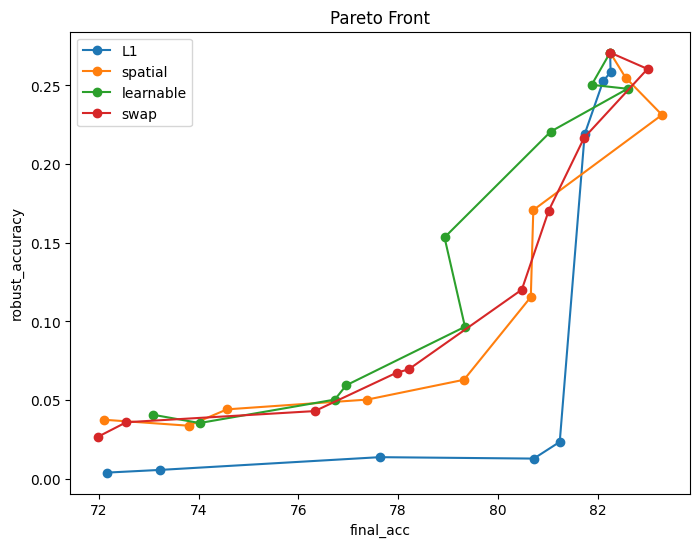

In [2]:
# initial_acc, final_acc, percent_small,total_dead
idx0="robust_accuracy"#"final_acc" robust_accuracy
idx1="final_acc"#"shift_accuracy"#"percent_dead_neurons"#"percent_below_t"

models_to_plot = [
    (L1_results,"L1"),
    (spatial_results,"spatial"),
    (spatial_learnable,"learnable"),
    (spatial_swap,"swap"),
    #(cluster400_results,"cluster400"),
    #(spatial_l2,"spatial_l2")

]
n=-1
lists=[]
labels=[]
for model in models_to_plot:
    lists.append([(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in model[0]][:n])
    labels.append(model[1])

# list1 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in model_1[0]][0:n]
# list2 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in model_2[0]][0:m]

# util.plot_two_lists(list1, list2, title="Pareto Front", ylabel=idx0, xlabel=idx1,label1=model_1[1],label2=model_2[1])
util.plot_lists(lists, title="Pareto Front", xlabel=idx1, ylabel=idx0, labels=labels)


In [8]:
! pip install python_papi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.2 MB/s eta 0:00:00


In [4]:
# initial_acc, final_acc, percent_small,total_dead
idx0=1
idx1=idx0+6
#model_1 = (spatial_results,"spatial")
#model_1 = (L1_results,"L1")
model_1 = (spatial_learnable,"learnable")
#model_1 = (spatial_swap,"swap")

# model_2 = (spatial_results,"spatial")
#model_2 = (L1_results,"L1")
#model_2 = (spatial_learnable,"learnable")
model_2 = (spatial_swap,"swap")
n=6
m=5
list1 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in model_1[0]][0:n]
list2 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in model_2[0]][0:m]
util.plot_two_lists(list1, list2, title="Generalization Pareto Front", ylabel="Train acc", xlabel="Test acc "+str(threshold),label1=model_1[1],label2=model_2[1])

IndexError: tuple index out of range

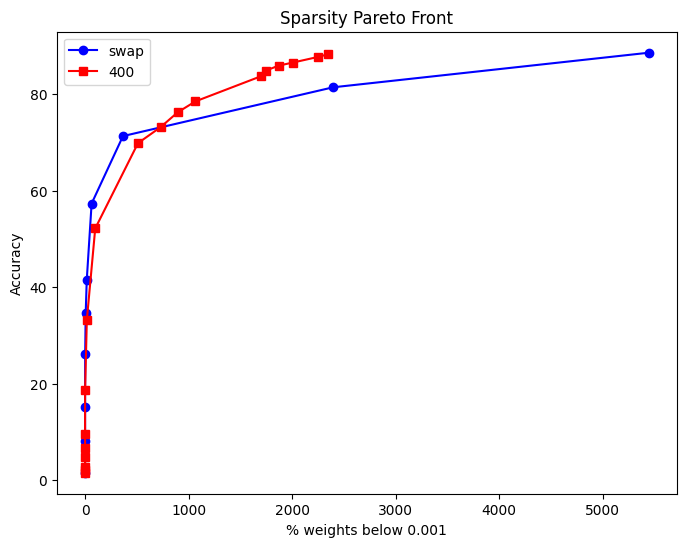

In [20]:
# initial_acc, final_acc, percent_small,total_dead
idx0=2
idx1=3
list1 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in spatial_results]
list2 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in cluster400_results]
util.plot_two_lists(list1, list2, title="Sparsity Pareto Front", ylabel="Accuracy", xlabel="% weights below "+str(threshold),label1="swap",label2="400")

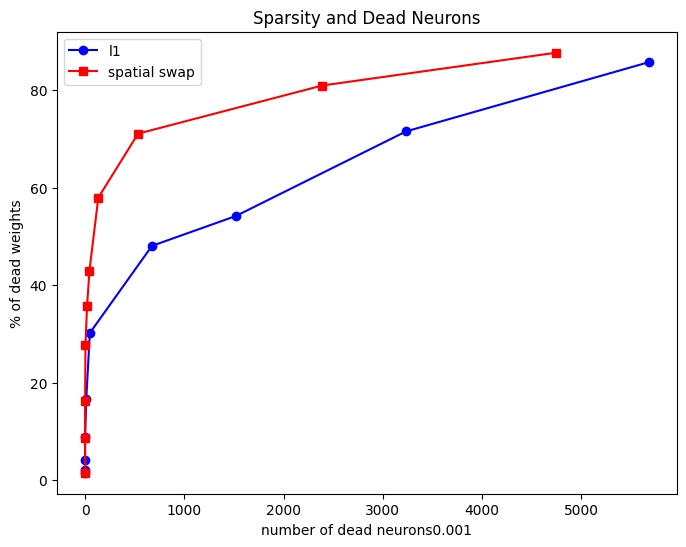

In [6]:
# initial_acc, final_acc, percent_small,total_dead
idx0=2
idx1=3
list1 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in L1_results]
list2 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in spatial_swap]
util.plot_two_lists(list1, list2, title="Sparsity and Dead Neurons", ylabel="% of dead weights", xlabel="number of dead neurons"+str(threshold),label1="l1",label2="spatial swap")

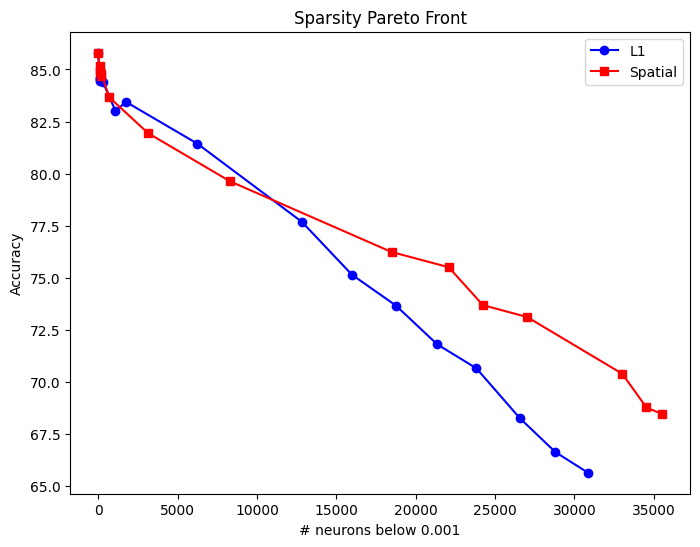

In [11]:
# initial_acc, final_acc, percent_small,total_dead
idx0=1
idx1=3
list1 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in L1_results]
list2 = [(baseline_results[0][idx0],baseline_results[0][idx1])] + [(x[idx0],x[idx1]) for x in spatial_results]
util.plot_two_lists(list1, list2, title="Sparsity Pareto Front", ylabel="Accuracy", xlabel="# neurons below "+str(threshold))

/tmp/ipykernel_2713473/752454694.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("./models/L1/L1_10000.pt")


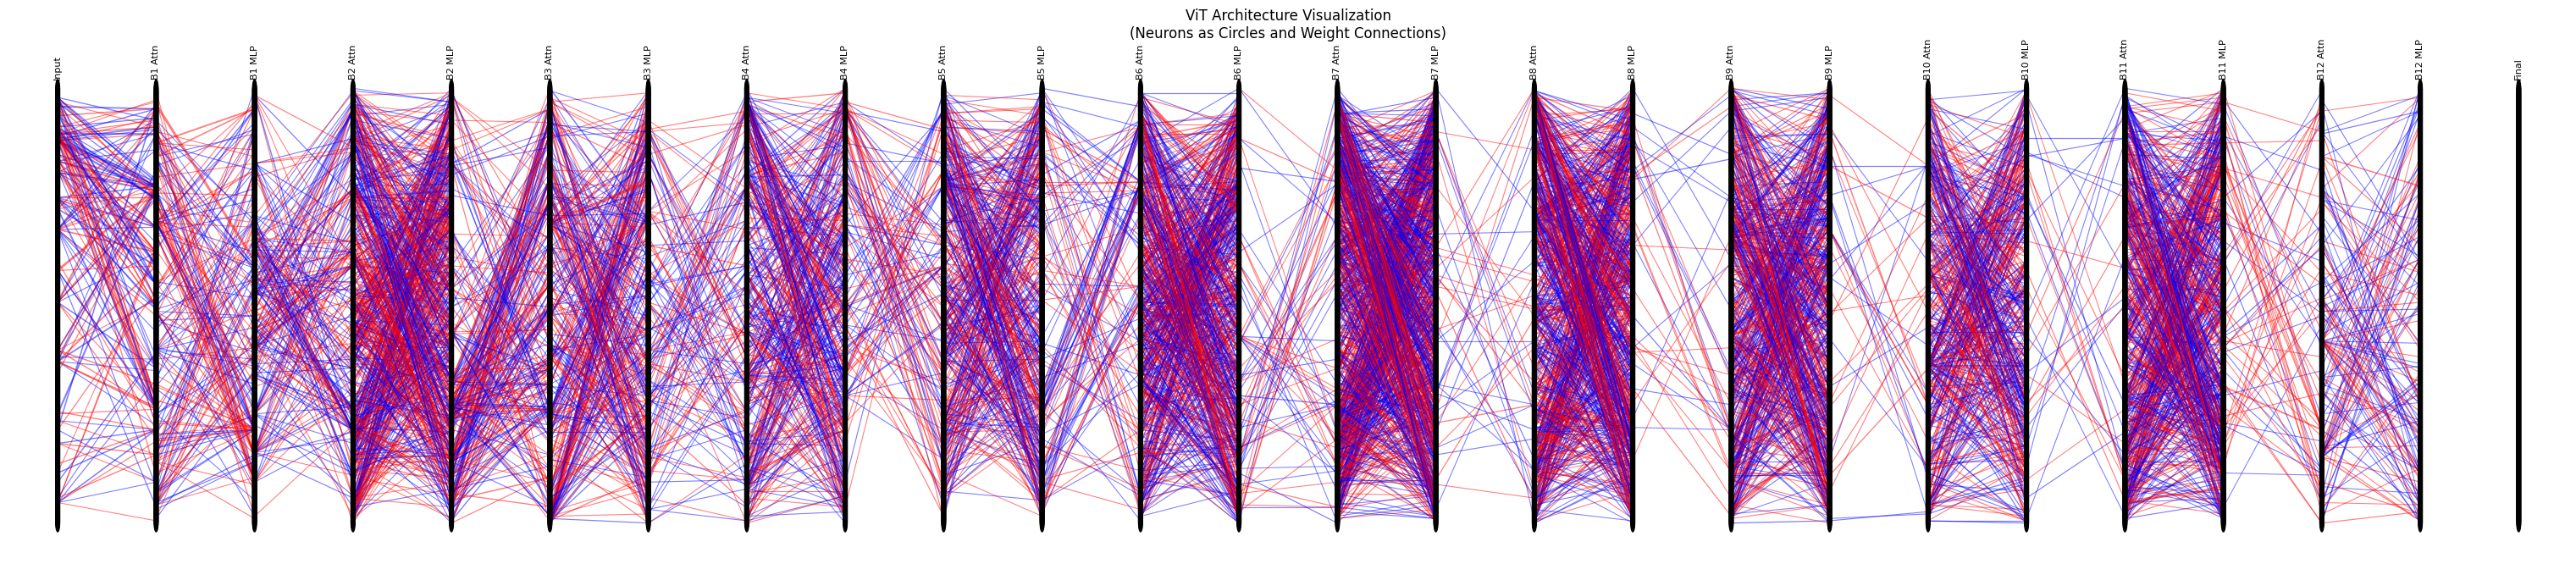

/tmp/ipykernel_2713473/752454694.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("./models/spatial/spatial_650.pt")


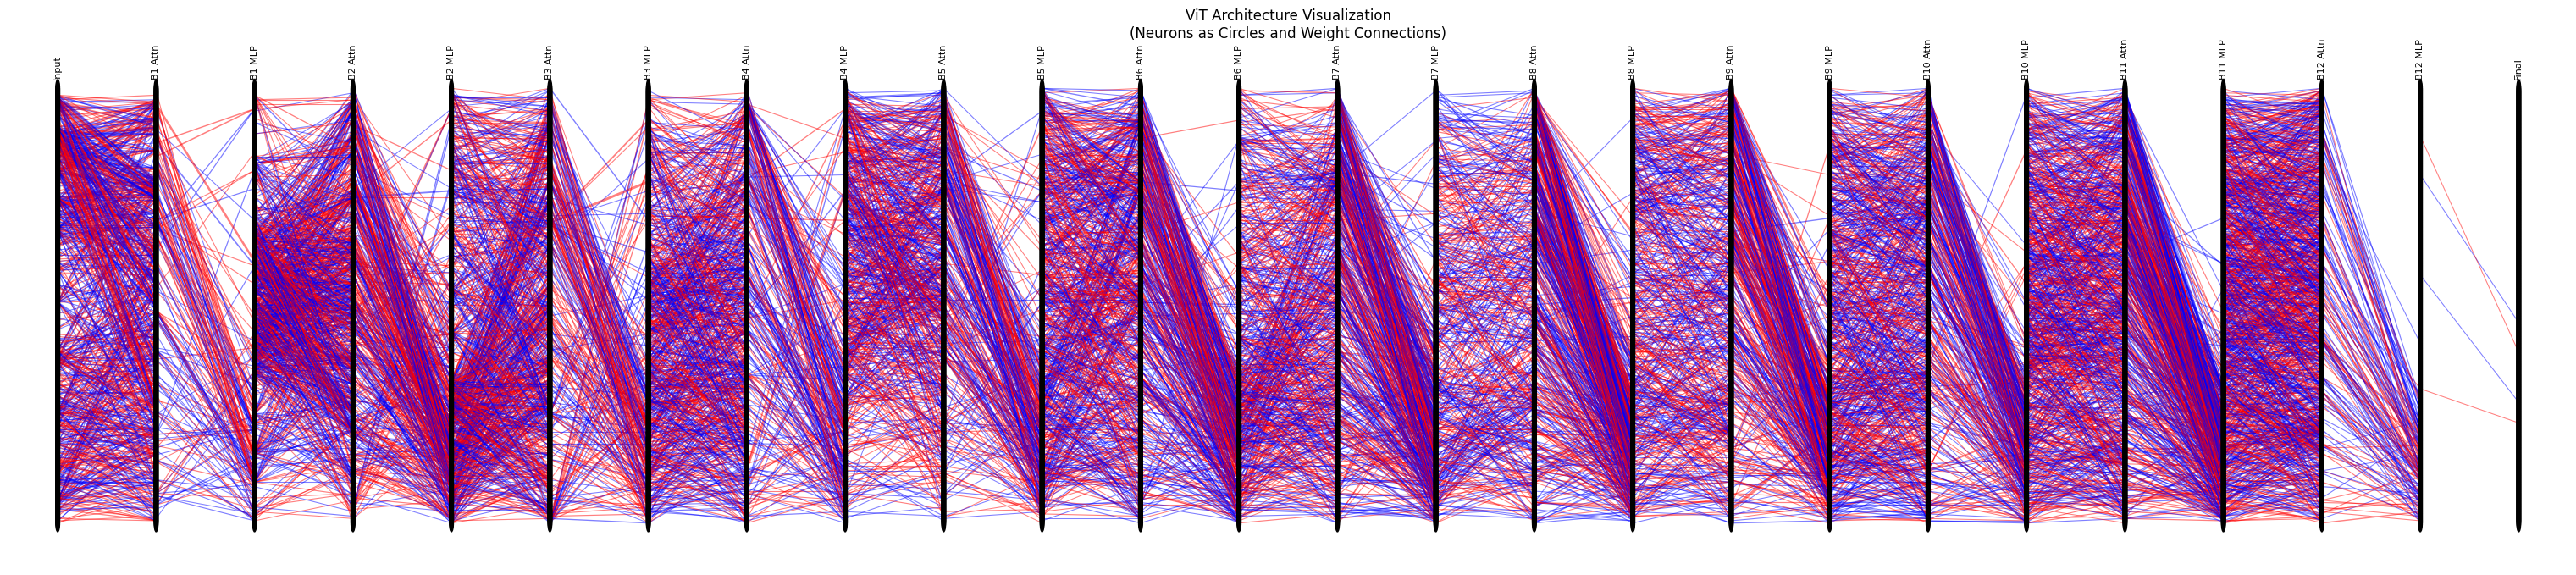

In [12]:
state_dict = torch.load("./models/L1/L1_10000.pt")
model.load_state_dict(state_dict)
util.visualize_vit_architecture(model, neuron_count=192, connection_threshold=0.1, include_identity=False)

state_dict = torch.load("./models/spatial/spatial_650.pt")
model.load_state_dict(state_dict)
util.visualize_vit_architecture(model, neuron_count=192, connection_threshold=0.1, include_identity=False)


./models/spatial/spatial_20.pt


/tmp/ipykernel_2713473/3443031452.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_name)



Overall Weight Statistics (regularized weights only):
Std: 0.054416
P10: 0.001518
P20: 0.007382
P30: 0.014505
P40: 0.022166
P50: 0.030622
P60: 0.040273
P70: 0.051705
P80: 0.066527
P90: 0.089597
P100: 2.617340
Percentage of values below 0.001: 8.20%
./models/spatial/spatial_40.pt

Overall Weight Statistics (regularized weights only):
Std: 0.050748
P10: 0.000414
P20: 0.002518
P30: 0.009322
P40: 0.017030
P50: 0.025504
P60: 0.035167
P70: 0.046664
P80: 0.061484
P90: 0.084467
P100: 2.613735
Percentage of values below 0.001: 15.27%
./models/spatial/spatial_80.pt

Overall Weight Statistics (regularized weights only):
Std: 0.045555
P10: 0.000143
P20: 0.000462
P30: 0.001808
P40: 0.008792
P50: 0.017402
P60: 0.027170
P70: 0.038796
P80: 0.053780
P90: 0.076896
P100: 2.612418
Percentage of values below 0.001: 26.47%
./models/spatial/spatial_120.pt

Overall Weight Statistics (regularized weights only):
Std: 0.041934
P10: 0.000082
P20: 0.000227
P30: 0.000557
P40: 0.002575
P50: 0.010918
P60: 0.020855
P

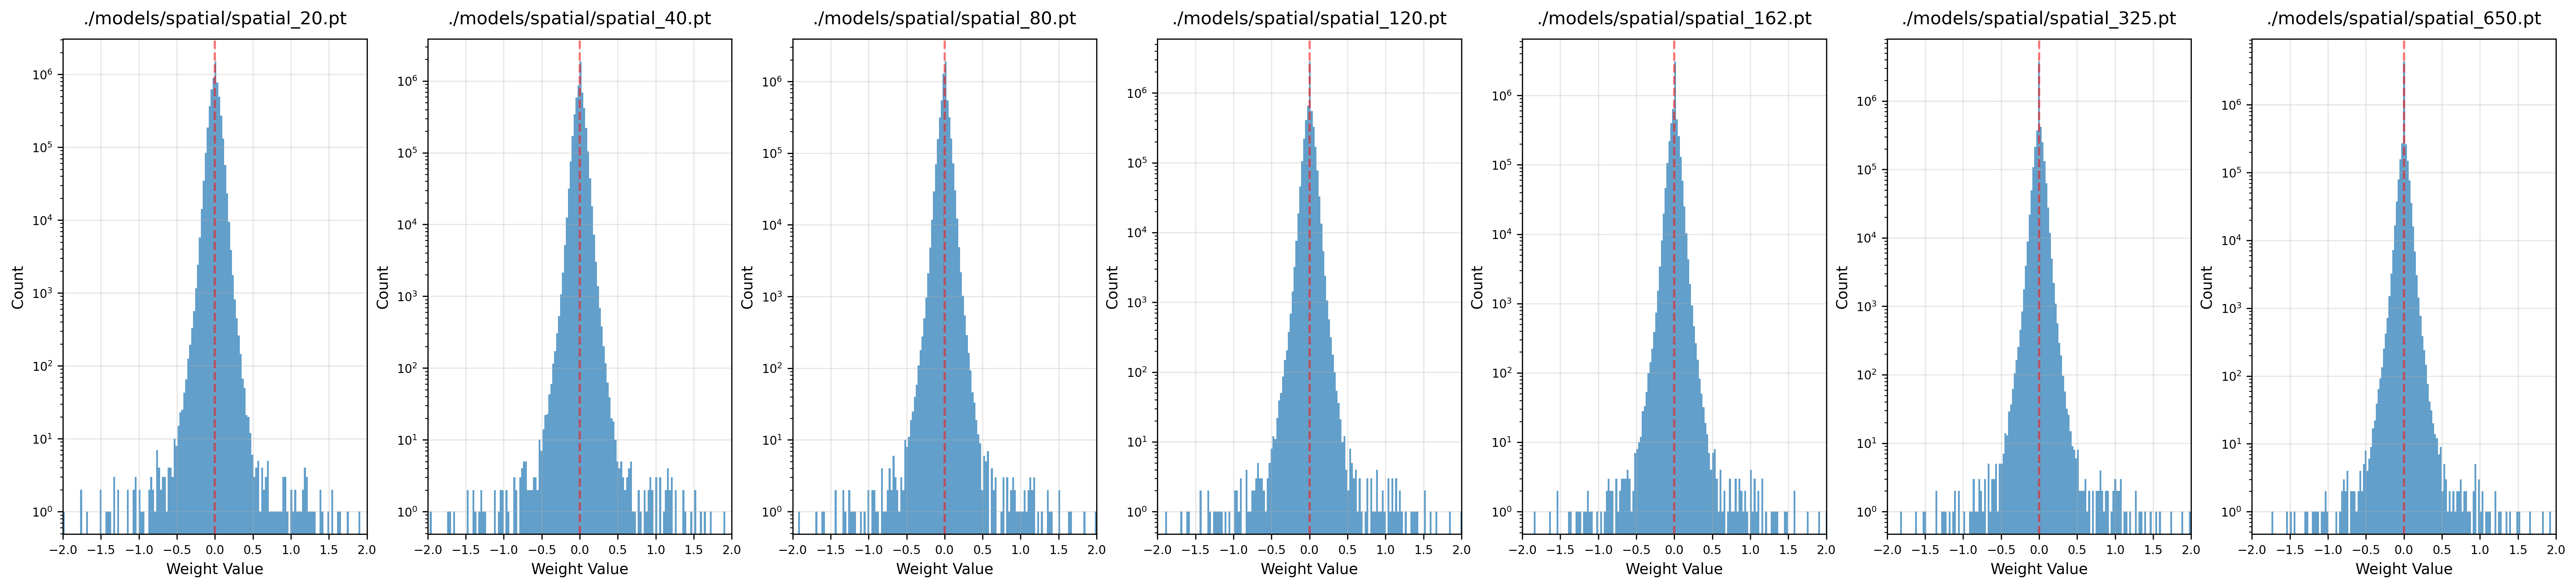

In [11]:

reg_type="spatial"
models =  glob.glob("./models/"+reg_type+"/*")
models.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))
fig, axes = plt.subplots(1, len(models), figsize=(30, 6), dpi=300)
for i, model_name in enumerate(models):
    print(model_name)
    state_dict = torch.load(model_name)
    weights = util.load_and_analyze_weights(state_dict)
    #util.plot_binned_histogram(weights, ax=axes[i], title=f'{model_name}',xlim=2,scale="linear")
    util.plot_binned_histogram(weights, ax=axes[i], title=f'{model_name}',xlim=2,scale="log")

In [2]:
import timm
print(timm.list_models())

['bat_resnext26ts', 'beit_base_patch16_224', 'beit_base_patch16_384', 'beit_large_patch16_224', 'beit_large_patch16_384', 'beit_large_patch16_512', 'beitv2_base_patch16_224', 'beitv2_large_patch16_224', 'botnet26t_256', 'botnet50ts_256', 'caformer_b36', 'caformer_m36', 'caformer_s18', 'caformer_s36', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_medium', 'coat_lite_medium_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_small', 'coat_tiny', 'coatnet_0_224', 'coatnet_0_rw_224', 'coatnet_1_224', 'coatnet_1_rw_224', 'coatnet_2_224', 'coatnet_2_rw_224', 'coatnet_3_224', 'coatnet_3_rw_224', 'coatnet_4_224', 'coatnet_5_224', 'coatnet_bn_0_rw_224', 'coatnet_nano_cc_224', 'coatnet_nano_rw_224', 'coatnet_pico_rw_224', 'coatnet_rmlp_0_rw_224', 'coatnet_rmlp_1_rw2_224', 'coatnet_rmlp_1_rw_224', 'coatnet_rmlp_2_rw_224', 'coatnet_rmlp_2